# Welcome to Quixotic

## What is Quixotic?
> Quixotic is a Python library for simple-to-use, low-code quantum computing.

<p align="center">
<img src="https://raw.githubusercontent.com/amaiya/quixotic/develop/example.png" width="800"/>
</p>

## Features
- Easy-to-apply quantum algorithms for a number of combinatorial optimization problems using [Quantum Annealing](https://en.wikipedia.org/wiki/Quantum_annealing) and [QAOA](https://arxiv.org/abs/1411.4028).
- Includes out-of-the-box support for various optimization problems like maximum clique and minimum vertex cover.
- Supports custom problem formulations as [QUBOs](https://leeds-faculty.colorado.edu/glover/511%20-%20QUBO%20Tutorial%20-%20updated%20version%20-%20May%204,%202019.pdf).
- Simple-to-use execution of algorithms using both local simulation on your laptop and managed quantum computers on [Amazon Braket](https://aws.amazon.com/braket/) or the D-Wave LEAP service.

## Install

1. `pip install -U pip`
2. `pip install quixotic`

**NOTE**: Python version `>= 3.7` is required.

## Usage Example: Find Maximum Clique in a Graph

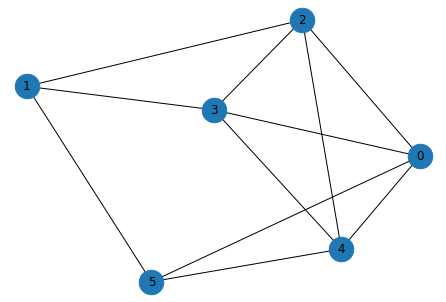

In [1]:
# construct or load your input graph
import networkx as nx
seed = 1967
g = nx.erdos_renyi_graph(6, p=0.5, seed=seed)
positions = nx.spring_layout(g, seed=seed)
nx.draw(g, with_labels=True, pos=positions, node_size=600)

In [2]:
# approximate a solution using QuantumAnnealer and extract results
from quixotic.core import QuantumAnnealer
qo = QuantumAnnealer(g, task='maximum_clique').execute()
nodes = qo.results()

Executing locally.


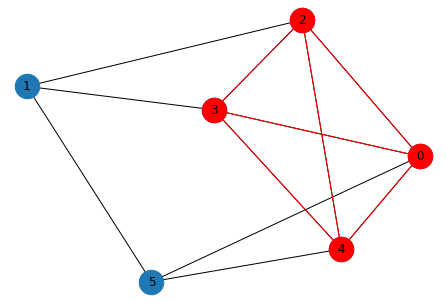

In [3]:
# plot nodes comprising the solution
sub = g.subgraph(nodes)
nx.draw(g, pos=positions, with_labels=True, node_size=600)
nx.draw(sub, pos=positions, node_color="r", edge_color="r", node_size=600)

## How to Execute on a Quantum Computer:
By default, **Quixotic** uses a local solver or simulator (e.g., quantum simulator, simulated annealing), which allows you to easily run and test on your CPU-based laptop.  To run on an actual managed quantum computer hosted on Amazon Braket, simply set the backend to `aws` and supply the `device_arn` and `s3_folder` parameters.  Here is an example of using the `QuantumAnnealer` on a quantum computer managed by Amazon Braket:
```python
from quixotic.core import QuantumAnnealer
qo = QuantumAnnealer(g, task='maximum_clique',
                     backend='aws',                                               # Amazon AWS as backend
                     device_arn='arn:aws:braket:::device/qpu/d-wave/DW_2000Q_6',  # D-Wave QPU
                     s3_folder = ("amazon-braket-Your-Bucket-Name", "Your-Folder-Name"))
qo.execute()  # executes algorithm on quantum hardware managed by Amazon Braket
solution_nodes = qo.results()
```
For the `QuantumAnnealer`, you can alternatively use D-Wave LEAP as a backend by specifying `backend='dwave'`.  However, to use a managed quantum computer, you'll need to first create an account with one of the backend providers using the instructions below:

#### Setting up an Amazon Braket Account
1. Create an AWS account and activate [Amazon Braket](https://aws.amazon.com/braket/).
2. During the onboarding process in the previous step, you will generate an Amazon Braket bucket of the form `amazon-braket-XXXXXX`.  Make note of this.
3. If running **Quixotic** on your laptop and using a remote quantum device, you'll have to [configure and store  your AWS credentials locally](https://docs.aws.amazon.com/cli/latest/userguide/cli-configure-files.html). If using a managed notebook within Amazon Braket itself, you can skip this step.
4. Set `backend='aws'` in addition to the `device_arn` and `s3_folder` parameters when executing either the `QuantumAnnealer` or the `QAOA` algorithm, as shown above.

#### Setting up a D-Wave LEAP Account
The `QuantumAnnealer` can also use D-Wave LEAP as a backend instead of Amazon Braket, if following the steps below.  (LEAP is D-Wave's cloud-based quantum service.)
1. Create a LEAP account and make note of the API Token assigned to you.
2. After **Quixotic** is installed, run the command: `dwave config create`.  Copy and paste your API token when prompted and select defaults for everything else.
3. When using `QuantumAnnealer` in **Quixotic**, set `backend='dwave'` and run the code below to use the default solver:
```python
# Executing on D-Wave quantum backend
from quixotic.core import QuantumAnnealer
solution_nodes = QuantumAnnealer(g, task='maximum_clique', backend='dwave').execute().results()
```
